![Course title](./images/title.png)
<i> Alexey Bochkarev </i> | [🌐 www.bochkarev.io](https://www.bochkarev.io) | [✉ a@bochkarev.io](mailto:a@bochkarev.io)

**Discord:** `co05-как-учить-машины-простые-примеры-про-ml`

# ③ Neural Networks: Image Recognition!

First: we will use `PyTorch`, a popular ML framework. That will make things way easier (and remove the necessity to take derivatives by hand :))

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms

There is an overhead cost though: we will need to load data with a somewhat unusual way (with this `DataLoader` class defined in `torch.utils.data`. On the positive side: MNIST dataset is so popular that PyTorch will download it for us automatically!

In [2]:
# Convert input images to tensors and normalize
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])

# Get the MNIST data from torchvision
dataset1 = datasets.MNIST('./', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('./', train=False,
                    transform=transform)

# Define the data loaders that will handle fetching of data
train_loader = torch.utils.data.DataLoader(dataset1, batch_size = 64)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size = 14)


Let's see what data we have ("eyeballing" the data is always a good thing to do!)

In [3]:
print(dataset1)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


In [4]:
import matplotlib.pyplot as plt
import numpy as np

Correct label: 5


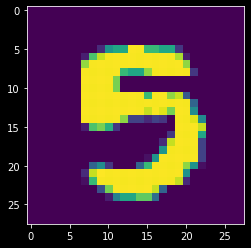

In [134]:
# Re-run this cell several times to
# check out different numbers!

m = np.random.randint(1, 1000)

img = dataset1[m][0]
lbl = dataset1[m][1]

plt.imshow(img[0])
print(f"Correct label: {lbl}")

## Let us define a simple model.

We will use more or less the same type of "perceptrons" we had before, but we will add layers. That is:

![NN architecture](./images/mnist-net.png)

In PyTorch speak this will look like:

In [6]:
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.Sigmoid(),
    nn.Linear(256, 64),
    nn.Sigmoid(),
    nn.Linear(64, 10)
)

## Now, fix a few parameters:

In [7]:
criterion = nn.CrossEntropyLoss()  # Somewhat in the similar logic like we had for Logit
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Optimization method
batch_size = 128
epochs = 500

## Training procedure:

In [98]:
# Note that I have also saved the model with:
# torch.save(model, "./MNIST_model.pt")
# (so you could try to load it instead of training for 2 hours...)

In [8]:
from time import time
t0 = time()

for epoch in range(epochs):
    running_loss = 0.0
    for i, (batch_data, target) in enumerate(train_loader):
        # forward pass
        optimizer.zero_grad()
        batch_data = batch_data.view(batch_data.size(0), -1)
        pred_labels = model(batch_data)  # forward pass
        
        loss = criterion(pred_labels, target)

        loss.backward()

        # Update parameters
        optimizer.step()

        # Print progress
        running_loss += loss.item()
        
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}] Loss: {running_loss:.3f}")

t1 = time()

print (f"\n ### Finished Training in {(t1-t0)/60:.1f} min ### \n")

Epoch [0] Loss: 2128.369
Epoch [10] Loss: 389.390
Epoch [20] Loss: 272.579
Epoch [30] Loss: 217.342
Epoch [40] Loss: 177.566
Epoch [50] Loss: 147.899
Epoch [60] Loss: 125.352
Epoch [70] Loss: 107.727
Epoch [80] Loss: 93.621
Epoch [90] Loss: 82.114
Epoch [100] Loss: 72.551
Epoch [110] Loss: 64.461
Epoch [120] Loss: 57.515
Epoch [130] Loss: 51.484
Epoch [140] Loss: 46.202
Epoch [150] Loss: 41.548
Epoch [160] Loss: 37.429
Epoch [170] Loss: 33.775
Epoch [180] Loss: 30.531
Epoch [190] Loss: 27.649
Epoch [200] Loss: 25.088
Epoch [210] Loss: 22.811
Epoch [220] Loss: 20.783
Epoch [230] Loss: 18.977
Epoch [240] Loss: 17.366
Epoch [250] Loss: 15.928
Epoch [260] Loss: 14.645
Epoch [270] Loss: 13.499
Epoch [280] Loss: 12.474
Epoch [290] Loss: 11.556
Epoch [300] Loss: 10.732
Epoch [310] Loss: 9.991
Epoch [320] Loss: 9.322
Epoch [330] Loss: 8.717
Epoch [340] Loss: 8.168
Epoch [350] Loss: 7.668
Epoch [360] Loss: 7.212
Epoch [370] Loss: 6.794
Epoch [380] Loss: 6.411
Epoch [390] Loss: 6.059
Epoch [400]

## Let's test what we have got:

Correct label: 4
Prediction: 4


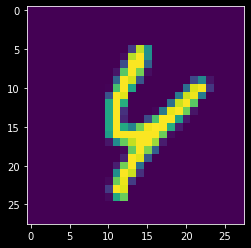

In [140]:
# Re-run this cell to check out
# different numbers from the test dataset!
m = np.random.randint(1, 1000)

img = dataset2[m][0]
lbl = dataset2[m][1]

plt.imshow(img[0])
with torch.no_grad():
    out = model.forward(img.view(img.size(0), -1)).float()

print(f"Correct label: {lbl}")
nums = [j for j in range(10)]

print(f"Prediction: {nums[np.argmax(out)]}")

In [94]:
correct_score = 0
total = len(dataset2)
nums = [j for j in range(10)]

for m in range(total):
    with torch.no_grad():
        img = dataset2[m][0]
        lbl = dataset2[m][1]
        out = model.forward(img.view(img.size(0), -1)).float()
        prediction = nums[np.argmax(out)]
        if prediction == lbl:
            correct_score += 1
            
print(f"Prediction score: {correct_score / total:.2f} ({correct_score} out of {total})")


Prediction score: 0.98 (9809 out of 10000)


The score of 98% correct answers is pretty impressive, if you ask me!

# Wrap-up
- **ML:** data-driven procedures.

- We discussed three fundamental types of models:
  - Linear Regression (wine prices),
  - Logistic Regression (Framingham Risk Score),
  - Neural Networks (Image recognition thing)
  
- Mostly, we define a "loss" and minimize it with respect to model parameters,
- It's important to pick a good model for the problem at hand
- NNs are quite powerful (even the simple ones we looked into in the course!), ...
- ... but *interpretability* might be an issue.
- usually, there are convenient libraries to run any given (more or less standard) type of models. So that you wouldn't need to take derivatives by hand :)
- **a lot** of resources online (Coursera / EdX), Kaggle, blogs, etc. -- `README` file for this course contains a few links to start with...